In [63]:
import numpy as np
import pandas as pd
from sklearn import metrics

# read training data pp-trial3
diabetes_train = pd.read_csv("diabetes_train.csv")

# read test data
diabetes_test = pd.read_csv("diabetes_test.csv")

## WRITE YOUR CODE HERE ##

# Divide training data into x_train and y_train
x_train = diabetes_train.iloc[:, :7]
y_train = diabetes_train.iloc[:, 7]

# x_test = diabetes_test.iloc[:, :7]
# y_test = diabetes_test.iloc[:, 7]

# # split into train and test
# X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.3, random_state = 4)

# Create SVC() object
from sklearn.svm import SVC
model = SVC(C = 1)

# Fit the model 
model.fit(x_train, y_train)

# # Make predictions
# y_pred = model.predict(X_test)

# from sklearn import metrics
# metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

print(diabetes_test.head())
predictions = model.predict(diabetes_test.iloc[:, :7])

# manually observe the first 10 predictions
predictions[:10]

C:\Users\kumarman\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [65]:
# Write the columns id, predictions into the output file
# Code is already written
d = pd.DataFrame({'id': diabetes_test['id'], 'Diabetes_Predicted': predictions})
# d.to_csv('/code/output/diabetes_predictions.csv', sep=",")
d

id  Diabetes_Predicted
0    194                   0
1     12                   0
2     76                   0
3     58                   0
4    193                   0
5    166                   0
6    258                   0
7    315                   0
8     77                   0
9    313                   1
10   151                   1
11    48                   0
12    81                   0
13   383                   1
14   140                   0
15   154                   0
16    79                   0
17   361                   0
18   349                   0
19   358                   1
20    31                   0
21   136                   1
22   268                   0
23   225                   0
24   296                   0
25   340                   0
26   179                   1
27   201                   0
28   389                   0
29   373                   0
..   ...                 ...
284  381                   0
285   22                   0
286    8                   0
287  237                   0
288  230                   0
289  196                   0
290   91                   0
291  312                   0
292  161                   0
293  390                   0
294  143                   0
295  239                   0
296   53                   0
297  236                   0
298  378                   0
299   51                   1
300  133                   1
301  134                   0
302  200                   0
303   26                   1
304   75                   0
305  234                   0
306   83                   0
307  388                   1
308   44                   0
309   38                   1
310  365                   0
311  375                   0
312  314                   0
313  266                   0

[314 rows x 2 columns]

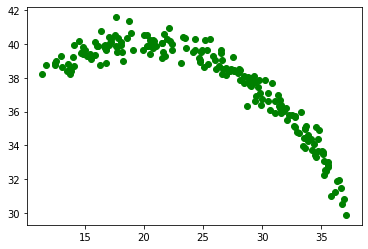

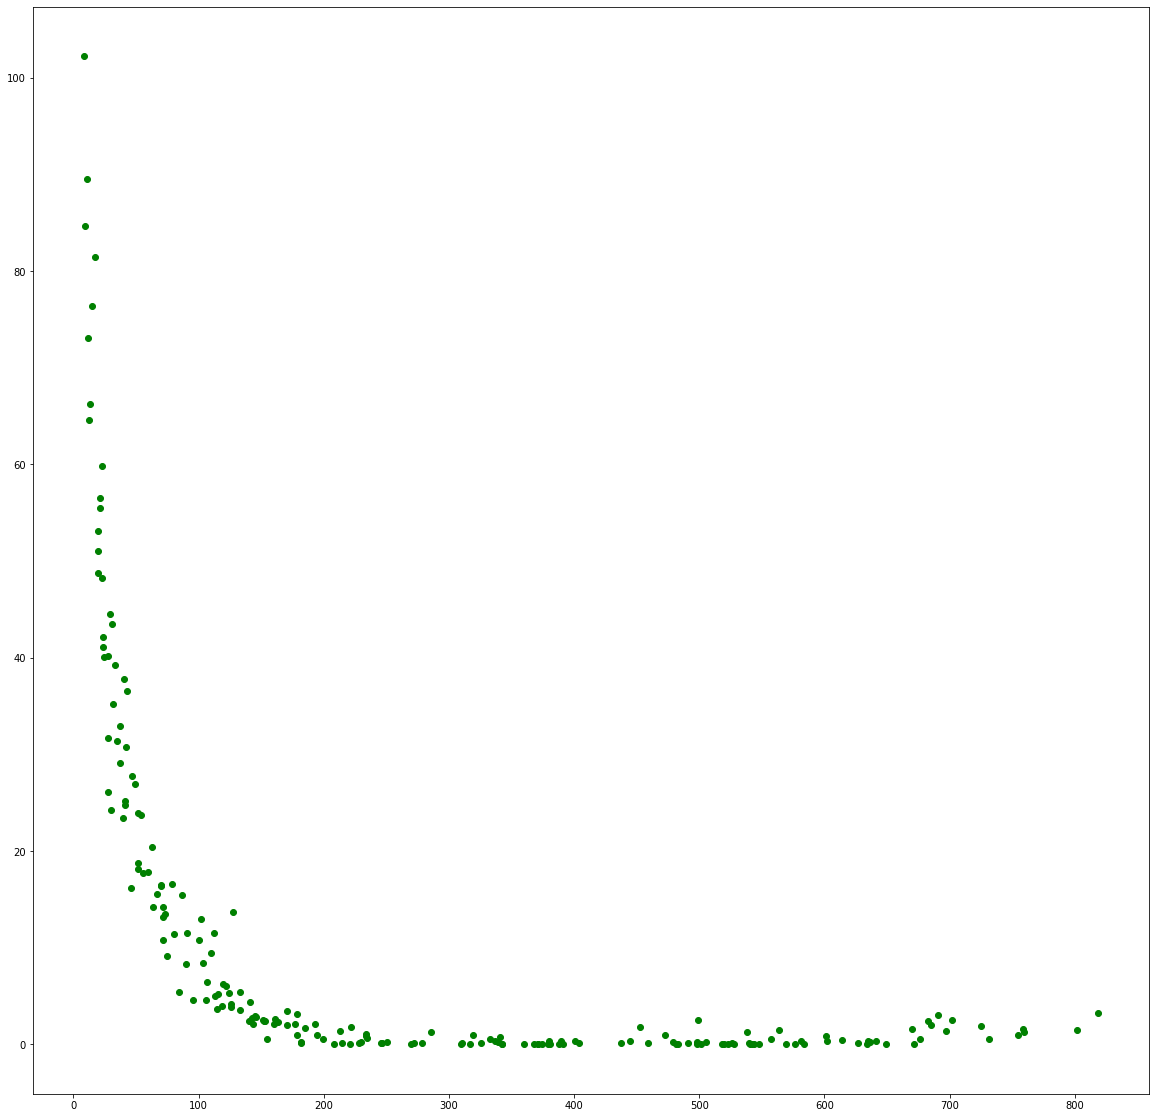

<Figure size 1440x1440 with 0 Axes>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
x=np.random.uniform(low=10, high=35, size=(200,)) + np.random.normal(loc=2, scale=0.5, size=200)
y = np.sqrt(400 - (x-20)**2)+ np.random.normal(loc=20, scale=0.5, size=200)
plt.scatter(x,y,color=['green'])
plt.figure(figsize=(20,20))
M = 40
p = (x-M)**2
q = (y-M)**2
plt.scatter(p,q,color=['green'])
plt.figure(figsize=(20,20))
plt.show()

In [3]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


# read training and test data
# diabetes_train = pd.read_csv("/data/training/diabetes_train.csv")
# diabetes_test = pd.read_csv("/data/test/diabetes_test.csv")

diabetes_train = pd.read_csv("diabetes_train.csv")
diabetes_test = pd.read_csv("diabetes_test.csv")

print(diabetes_train.head())
print(diabetes_test.head())

   No_Times_Pregnant  Plasma_Glucose  Diastolic_BP   Triceps   Insulin  \
0           0.529042        0.012069      0.267022  1.032156 -0.665222   
1          -0.405123       -0.765617     -0.853328 -1.154899  0.033186   
2          -0.093734        0.238894      0.587122 -0.584363 -0.648393   
3          -0.716511       -0.636003     -3.254079  0.841977 -0.614735   
4          -0.405123       -0.409178      0.267022 -0.013827 -0.261323   

        BMI       Age  Diabetes   id  
0  0.144255 -0.280841         0  336  
1  0.499992 -0.967063         0  379  
2 -0.666826  0.307350         1  375  
3  1.453368  0.209318         0    8  
4 -0.097646 -0.378873         0   36  
   No_Times_Pregnant  Plasma_Glucose  Diastolic_BP   Triceps   Insulin  \
0          -0.716511       -0.441582     -0.853328 -2.010703  0.218306   
1           2.085984        0.076876     -0.053078 -0.299095 -0.345469   
2          -0.716511       -0.441582     -1.173428 -0.774542 -0.177178   
3          -0.716511     

In [6]:
# create x and y train 
x_train = diabetes_train.iloc[:, :7]
y_train = diabetes_train.iloc[:, 7]

# WRITE YOUR CODE HERE 

# tune the model

# specify the number of folds for k-fold CV
n_folds = 5

# specify range of parameters (C) as a list
params = {"C":  [1, 10, 100, 1000]}


# create SVC object
linear_model = SVC(kernel="rbf")

In [7]:
# set up grid search scheme
model_cv = GridSearchCV(estimator = linear_model, 
                        param_grid = params, 
                        scoring= 'accuracy', 
                        cv = n_folds, 
                        verbose = 1,
                        return_train_score=True)      

# set up GridSearchCV()


# fit the model on n_folds
model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\kumarman\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kumarman\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kumarman\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly t

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None, param_grid={'C': [1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [8]:
# store CV results in cv_results
cv_results = model_cv.cv_results_
print(pd.DataFrame(model_cv.cv_results_))

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.005706      0.005940         0.001202        0.000404       1   
1       0.003001      0.000021         0.000793        0.000397      10   
2       0.005191      0.000404         0.001001        0.000001     100   
3       0.006391      0.000496         0.001010        0.000015    1000   

        params  split0_test_score  split1_test_score  split2_test_score  \
0     {'C': 1}           0.809524           0.698413           0.761905   
1    {'C': 10}           0.777778           0.746032           0.714286   
2   {'C': 100}           0.777778           0.666667           0.698413   
3  {'C': 1000}           0.793651           0.650794           0.666667   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.761905  ...         0.770701        0.043742                1   
1           0.730159  ...         0.742038        0.021031                2   
2          

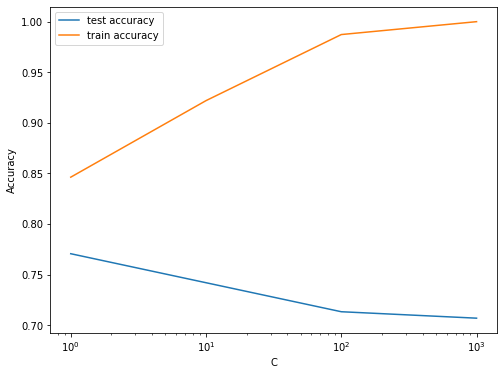

In [9]:
# plot C versus train and test scores (code already written)
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')
plt.show()
# plt.savefig('/code/output/hyperparam_c.png') 

In [10]:
# best hyperparameter C and best (test) accuracy
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']
print(best_score)
print(best_C)

0.7707006369426752
1


In [14]:
#  choose the best value of C 
C = 1

# build a model with best value of C
linear_model = SVC(C=10, kernel="rbf")
linear_model.fit(x_train, y_train)


# make predictions
print(diabetes_test.head())
predictions = linear_model.predict(diabetes_test.iloc[:, :7])
predictions[:5]

# YOUR CODE ENDS HERE

# write columns id, predictions into the output file
d = pd.DataFrame({'id': diabetes_test['id'], 'Diabetes_Predicted': predictions})
print("\n", "d", "\n", d.head())

# write the output
# d.to_csv('/code/output/diabetes_predictions.csv', sep=",")

   No_Times_Pregnant  Plasma_Glucose  Diastolic_BP   Triceps   Insulin  \
0          -0.716511       -0.441582     -0.853328 -2.010703  0.218306   
1           2.085984        0.076876     -0.053078 -0.299095 -0.345469   
2          -0.716511       -0.441582     -1.173428 -0.774542 -0.177178   
3          -0.716511       -1.122057     -3.254079  1.222335 -0.480102   
4          -0.716511       -0.506389      0.106972  0.081263 -0.623149   

        BMI       Age   id  
0 -1.093710 -0.967063  194  
1 -0.282630  0.993572   12  
2 -1.122169 -0.771000   76  
3  3.118218 -0.476904   58  
4 -0.325318 -0.672968  193  

 d 
     id  Diabetes_Predicted
0  194                   0
1   12                   1
2   76                   0
3   58                   0
4  193                   0


C:\Users\kumarman\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
